In [1]:
# Se cargan bibliotecas de manejo de datos, numéricos y graficación
# Shift+Enter procesa la información de la celda

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Lee un archivo de texto con la función Pandas "read_csv", con elementos separados por mas de 
# un espacio, brincándose 4 renglones del inicio (encabezados)

df0 = pd.read_csv('yecora.TXT', skiprows=4, sep='\s+')

In [3]:
# Lee los primeros 5 renglones del archivo
df0.head()

,DD/MM/AAAA,HH:MM,DIRS,DIRR,VELS,VELR,TEMP,HR,PB,PREC,RADSOL
0,25/01/2018,22:00,201,220,11.57,24.6,18.7,12,846.9,0.0,504.2
1,25/01/2018,23:00,172,196,11.09,20.0,18.4,10,847.1,0.0,298.7
2,26/01/2018,00:00,221,191,7.25,16.6,15.9,12,847.4,0.0,63.8
3,26/01/2018,01:00,184,184,6.20,10.8,10.6,22,847.9,0.0,0.0
4,26/01/2018,02:00,168,187,2.42,10.2,6.7,32,848.2,0.0,0.0


In [4]:
# Dar estructura de datos (DataFrame)
df = pd.DataFrame(df0)

In [5]:
# Ver los tipos de datos que Pandas ha reconocido al leer
df.dtypes

DD/MM/AAAA     object
HH:MM          object
DIRS            int64
DIRR            int64
VELS          float64
VELR          float64
TEMP          float64
HR              int64
PB            float64
PREC          float64
RADSOL        float64
dtype: object

In [6]:
# Combinar las columnas "DD/MM/AAAA" con "HH:MM" y convertirla a variable de tiempo
# Se crea una nueva columna "Fecha" al final con formato de tiempo.
# Eliminamos las dos primeras columnas que ya no necesitaremos
df['FECHA'] = pd.to_datetime(df.apply(lambda x: x['DD/MM/AAAA'] + ' ' + x['HH:MM'], 1))
df = df.drop(['DD/MM/AAAA', 'HH:MM'], 1)

In [7]:
df.head()

,DIRS,DIRR,VELS,VELR,TEMP,HR,PB,PREC,RADSOL,FECHA
0,201,220,11.57,24.6,18.7,12,846.9,0.0,504.2,2018-01-25 22:00:00
1,172,196,11.09,20.0,18.4,10,847.1,0.0,298.7,2018-01-25 23:00:00
2,221,191,7.25,16.6,15.9,12,847.4,0.0,63.8,2018-01-26 00:00:00
3,184,184,6.20,10.8,10.6,22,847.9,0.0,0.0,2018-01-26 01:00:00
4,168,187,2.42,10.2,6.7,32,848.2,0.0,0.0,2018-01-26 02:00:00


In [8]:
# Realiza un análisis exploratorio de datos
df.describe()

,DIRS,DIRR,VELS,VELR,TEMP,HR,PB,PREC,RADSOL
count,146.000000,146.00000,146.000000,146.000000,146.000000,146.000000,146.000000,146.0,146.00000
mean,111.883562,180.30137,3.826712,9.041096,8.008219,42.191781,848.632192,0.0,214.50000
std,111.420082,72.08973,4.893851,9.171821,10.330928,23.549893,1.488621,0.0,288.43753
min,0.000000,15.00000,0.000000,0.000000,-7.900000,6.000000,845.600000,0.0,0.00000
25%,0.000000,149.25000,0.000000,0.000000,-1.100000,17.000000,847.700000,0.0,0.00000
50%,104.000000,181.00000,1.290000,6.200000,6.000000,45.500000,848.400000,0.0,0.00000
75%,185.000000,204.00000,7.590000,17.050000,18.600000,66.000000,849.600000,0.0,483.30000
max,352.000000,351.00000,16.620000,28.100000,24.500000,77.000000,853.100000,0.0,774.30000


In [9]:
# Selecciona los renglones con Temperatura entre 24ºC y 25ºC
df_tmp = df[df.TEMP > 24] 
df_select = df_tmp[df_tmp.TEMP < 25]
df_select

,DIRS,DIRR,VELS,VELR,TEMP,HR,PB,PREC,RADSOL,FECHA
70,181,172,7.97,18.3,24.4,10,847.2,0.0,738.8,2018-01-28 20:00:00
71,159,215,8.93,21.2,24.5,8,846.7,0.0,653.2,2018-01-28 21:00:00
72,167,181,8.08,16.0,24.4,7,846.7,0.0,508.0,2018-01-28 22:00:00
73,261,254,5.31,17.2,24.5,9,846.8,0.0,300.7,2018-01-28 23:00:00


In [10]:
# Calcula el promedio de las columnas, excepto en la fecha
df.mean()

DIRS      111.883562
DIRR      180.301370
VELS        3.826712
VELR        9.041096
TEMP        8.008219
HR         42.191781
PB        848.632192
PREC        0.000000
RADSOL    214.500000
dtype: float64

In [11]:
# Calcula el promedio de las Temperaturas
df.TEMP.mean()

8.008219178082191

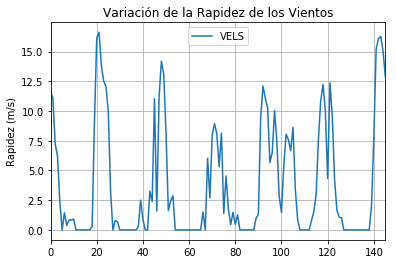

In [12]:
# Gráfica de la rapidez de los vientos (m/s) 
plt.figure(); df.VELS.plot(); plt.legend(loc='best')
plt.title("Variación de la Rapidez de los Vientos")
plt.ylabel("Rapidez (m/s)")
plt.grid(True)
plt.show()

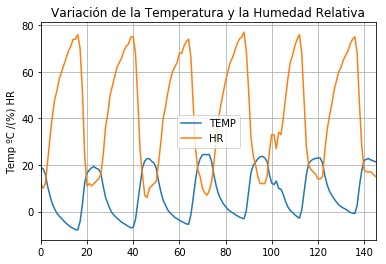

In [13]:
# Gráfica de Temperatura y Humedad Relativa
# Se observa una relación directa entre las 2, cuando una es menor,
# la otra es mayor.
df1 = df[['TEMP','HR']]
plt.figure(); df1.plot(); plt.legend(loc='best')
plt.title("Variación de la Temperatura y la Humedad Relativa")
plt.ylabel("Temp ºC /(%) HR")
plt.grid(True)
plt.show()

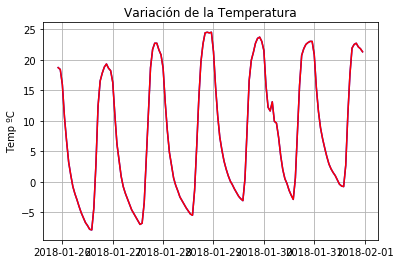

In [14]:
plt.plot_date(x=df.FECHA, y=df.TEMP, fmt="b-")
plt.plot_date(x=df.FECHA, y=df.TEMP, fmt="r-")
plt.title("Variación de la Temperatura")
plt.ylabel("Temp ºC")
plt.grid(True)
plt.show()

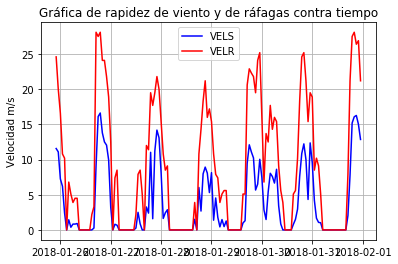

In [15]:
# Gráfica de velocidad de viento y de ráfagas
# Se alcanza a notar que poco antes de media noche hay mayor viento

plt.plot_date(x=df.FECHA, y=df.VELS, fmt="b-"); plt.legend(loc='best')
plt.plot_date(x=df.FECHA, y=df.VELR, fmt="r-"); plt.legend(loc='best')
plt.title("Gráfica de rapidez de viento y de ráfagas contra tiempo")
plt.ylabel("Velocidad m/s")
plt.grid(True)
plt.show()



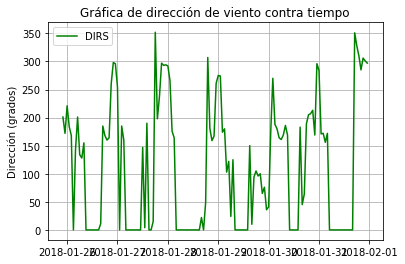

In [16]:
# Gráfica de dirección contra tiempo
# Se encuentra que los vientos más frecentes se encuentran entre 275 y 360 grados

plt.plot_date(x=df.FECHA, y=df.DIRS, fmt="g-"); plt.legend(loc='best')
plt.title("Gráfica de dirección de viento contra tiempo")
plt.ylabel("Dirección (grados)")
plt.grid(True)
plt.show()

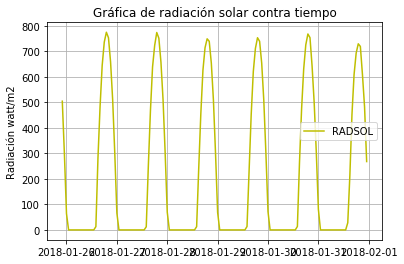

In [17]:
# Gráfica de radiación solar contra tiempo
# Se observan máximos cerca de las 19hrs

plt.plot_date(x=df.FECHA, y=df.RADSOL, fmt="y-"); plt.legend(loc='best')
plt.title("Gráfica de radiación solar contra tiempo")
plt.ylabel("Radiación watt/m2")
plt.grid(True)
plt.show()

In [24]:
# Para determinar el lapso de temperatura diaria, tomamos la diferencia
# del valor máximo y mínimo = 24.5 - (-7.9) = 32.4 C
df2 = df[['TEMP']]
df2.max() - df2.min()

TEMP    32.4
dtype: float64